In [ ]:
pip list

In [ ]:

!pip install opencv-python



In [ ]:
pip install matplotlib

In [ ]:
!pip install primesense

In [3]:
!pip install pillow

In [1]:
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
from IPython import display



## testing source camara
this is to test if the open cv is picking up that there is a camera 

In [ ]:
def testDevice(source):
   cap = cv2.VideoCapture(source) 
   if cap is None or not cap.isOpened():
       print('Warning: unable to open video source: ', source)

testDevice(1) # prints message

## code test 1 
this is the first of the codes that are being tested for image processing 


In [ ]:

vc = cv2.VideoCapture(0)

if vc.isOpened(): # try to get the first frame
    is_capturing, frame = vc.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored
    webcam_preview = plt.imshow(frame)    
else:
    is_capturing = False

while is_capturing:
    try:    # Lookout for a keyboardInterrupt to stop the script
        is_capturing, frame = vc.read()
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored
        webcam_preview.set_data(frame)
        plt.draw()

        display.clear_output(wait=True)
        display.display(plt.gcf())

        plt.pause(5)#0.016)    # the pause time is = 1 / framerate
    except KeyboardInterrupt:
        vc.release()


## code test 2 
this is to test getting singular image fro the camera and then closing it. 


True


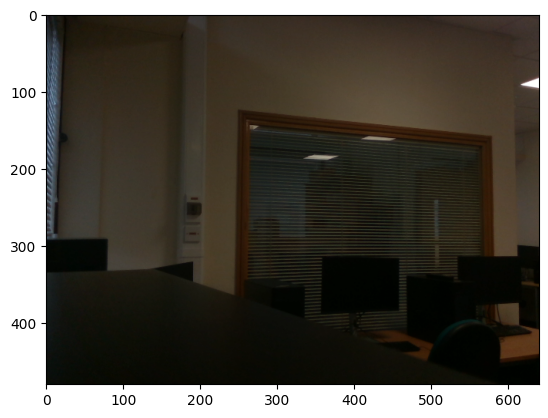

In [2]:
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
from IPython import display

pin = True;
# sets the video capture to the first camera in the system.
vc = cv2.VideoCapture(0)
    
while (pin):
    #this takes the image from the camera and its refrances. 
    ref, frame = vc.read()
    print(ref)
    new_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    if (new_frame[0,0,0] != 0) and  (new_frame[0,0,2] != 0) and  (new_frame[0,0,1] != 0):
        pin = False;


# geting the image diamentions 
yh = len(frame)
xw = len(frame[0])
zd = len(frame[0,1])

# showing the end results of image capture. 
#plt.imshow(frame)
plt.imshow(new_frame)

# releases the camera from capture 
vc.release() 

## code for maching with cv 


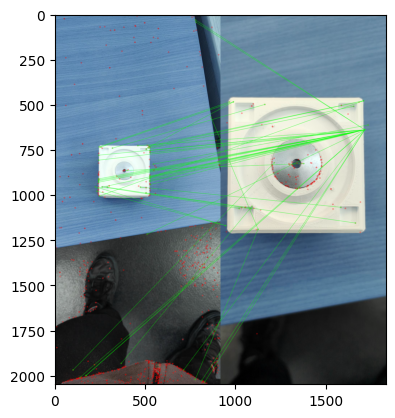

(<matplotlib.image.AxesImage at 0x7f27e7bb9850>, None)

In [3]:
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
from IPython import display

img1 = cv2.imread('far_image.jpeg',cv2.COLOR_BGR2RGB)          # queryImage
img2 = cv2.imread('close_image.jpeg',cv2.COLOR_BGR2RGB) # trainImage

# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

#FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 3)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv2.DrawMatchesFlags_DEFAULT)
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img3,),plt.show()

## BTMARKER 


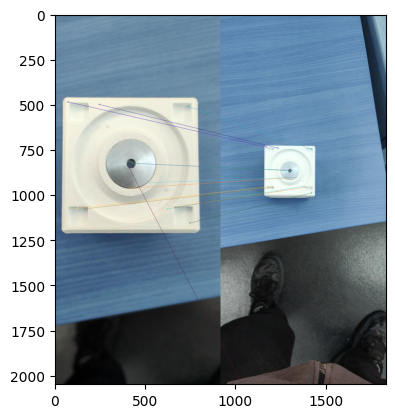

(<matplotlib.image.AxesImage at 0x7f27e7c19fd0>, None)

In [4]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img1 = cv.imread('close_image.jpeg',cv2.COLOR_BGR2RGB)            # queryImage
img2 = cv.imread('far_image.jpeg',cv2.COLOR_BGR2RGB) # trainImage

# Initiate SIFT detector
sift = cv.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params

bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

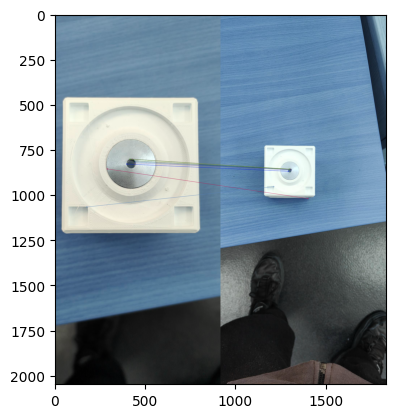

(<matplotlib.image.AxesImage at 0x7f27e7c0bc40>, None)

In [5]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img1 = cv.imread('close_image.jpeg',cv2.COLOR_BGR2RGB)            # queryImage
img2 = cv.imread('far_image.jpeg',cv2.COLOR_BGR2RGB) # trainImage

# Initiate ORB detector
orb = cv.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

## another image detection method

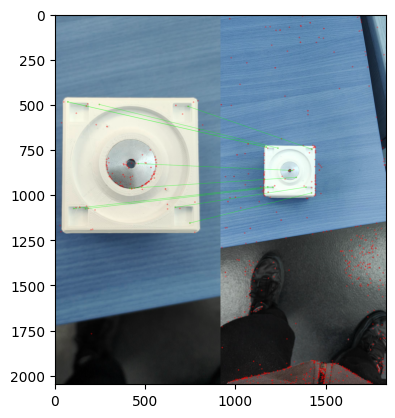

(<matplotlib.image.AxesImage at 0x7f27e7b35970>, None)

In [6]:
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
from IPython import display

img1 = cv2.imread('close_image.jpeg',cv2.COLOR_BGR2RGB)          # queryImage
img2 = cv2.imread('far_image.jpeg',cv2.COLOR_BGR2RGB) # trainImage

# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

#FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 3)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
        
        
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv2.DrawMatchesFlags_DEFAULT)
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img3,),plt.show()


## saving images of box with camera 


True
True
True
True
True
True
True
True


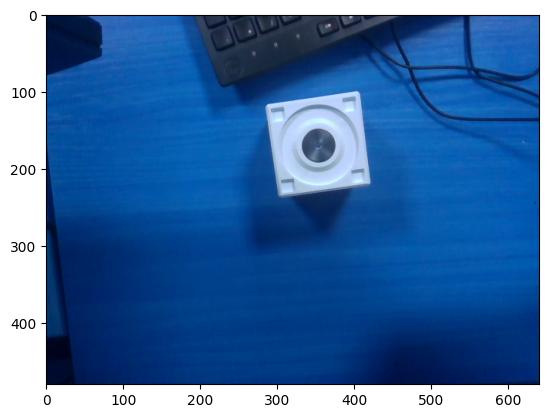

In [13]:
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
from IPython import display


pin = True;
# sets the video capture to the first camera in the system.
vc = cv2.VideoCapture(0)
    
while (pin):
    #this takes the image from the camera and its refrances. 
    ref, frame = vc.read()
    print(ref)
    new_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    if (new_frame[0,0,0] != 0) and  (new_frame[0,0,2] != 0) and  (new_frame[0,0,1] != 0):
        pin = False;


# geting the image diamentions 
yh = len(frame)
xw = len(frame[0])
zd = len(frame[0,1])

# showing the end results of image capture. 
plt.imshow(frame)
#plt.imshow(new_frame)

cv2.imwrite('image_from_camara_test.jpg',frame)

# releases the camera from capture 
vc.release() 

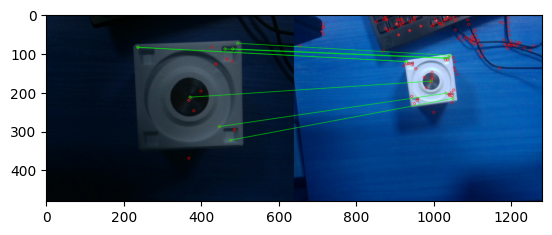

(< cv2.KeyPoint 0x7f119d032450>, < cv2.KeyPoint 0x7f119d032b70>, < cv2.KeyPoint 0x7f119d0324b0>, < cv2.KeyPoint 0x7f119d21c270>, < cv2.KeyPoint 0x7f119d21c5a0>, < cv2.KeyPoint 0x7f119d21c600>, < cv2.KeyPoint 0x7f114c2f78d0>, < cv2.KeyPoint 0x7f119d1d2f30>, < cv2.KeyPoint 0x7f119d1d2480>, < cv2.KeyPoint 0x7f119d09a8d0>, < cv2.KeyPoint 0x7f119d09aa20>, < cv2.KeyPoint 0x7f119cb437b0>, < cv2.KeyPoint 0x7f119cb437e0>, < cv2.KeyPoint 0x7f119cbf6600>, < cv2.KeyPoint 0x7f119cbf65d0>, < cv2.KeyPoint 0x7f119cbf60c0>, < cv2.KeyPoint 0x7f119cbafb70>, < cv2.KeyPoint 0x7f119cbafd50>, < cv2.KeyPoint 0x7f119d1340f0>, < cv2.KeyPoint 0x7f119d134060>, < cv2.KeyPoint 0x7f119d134090>, < cv2.KeyPoint 0x7f119d134030>)


In [17]:
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
from IPython import display

img1 = cv2.imread('image_from_camara_test.jpg',cv2.COLOR_BGR2RGB)          # queryImage
img2 = cv2.imread('image_from_camara_distance_test.jpg',cv2.COLOR_BGR2RGB) # trainImage

# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

#FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 3)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
        
        
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv2.DrawMatchesFlags_DEFAULT)
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img3),plt.show()
print(kp1)